## Logic Gates

In [11]:
import numpy as np

def sigmoid(x):
    return 1 / 1+ np.exp(-x)

def sigmoid_derivative(x):
    return x * (1 - x)


In [18]:
class Perceptron:
    def __init__(self,input_dim=2,learning_rate=0.2):
        self.weights = np.random.randn(input_dim)
        self.bias = np.random.randn()
        self.lr = learning_rate
        
    def predict(self,inputs):
        summation = np.dot(inputs, self.weights) + self.bias
        return sigmoid(summation)
    
    def train(self,inputs,targets,epochs=1000):
        for _ in range(epochs):
            for input_vec,target in zip(inputs, targets):
                output = self.predict(input_vec)
                error = target - output
                adjustments = error * sigmoid_derivative(output)
                self.weights += self.lr * adjustments * np.array(input_vec)
                self.bias += self.lr * adjustments
        return self.weights,self.bias
    

In [19]:
logical_gates = {
    "AND": {
        "inputs": np.array([[0,0],[0,1],[1,0],[1,1]]),
        'targets': np.array([0,0,0,1])
    },
    "OR": {
        "inputs":np.array([[0,0],[0,1],[1,0],[1,1]]),
        "targets": np.array([0,1,1,1])
    },
    "NOT":{
        "inputs": np.array([[0],[1]]),
        "targets": np.array([1,0])
    },
    "NAND":{
        "inputs": np.array([[0,0],[0,1],[1,0],[1,1]]),
        "targets": np.array([1,1,1,0])
    },
    "NOR":{
        "inputs": np.array([[0,0],[0,1],[1,0],[1,1]]),
        "targets": np.array([1,0,0,0])
    }
    
}

In [20]:
for gate, data in logical_gates.items():
    input_dim = data['inputs'].shape[1]
    perceptron = Perceptron(input_dim,0.1)
    final_weights, final_bias = perceptron.train(data['inputs'],data['targets'])
    print(f"\n{gate} gates final wights and bias")
    print(f"Weights: {final_weights}")
    print(f"Bias: {final_bias}")


AND gates final wights and bias
Weights: [1.47852675 1.10936573]
Bias: 5.17026891004833

OR gates final wights and bias
Weights: [-0.88425575  0.92724288]
Bias: 4.8880414422608895

NOT gates final wights and bias
Weights: [2.45623004]
Bias: 3.1694008578588293

NAND gates final wights and bias
Weights: [2.25215533 1.33310185]
Bias: 2.901172676659198

NOR gates final wights and bias
Weights: [4.96554368 0.21784386]
Bias: 7.822146133803326


In [21]:
import numpy as np

def sigmoid(x):
    return 1 / 1 + np.exp(-x)

def sigmoid_derivative(x):
    return x * (1-x)

In [25]:
class XORPerceptron:
    def __init__(self, input_dim=2, hidden_dim=2, learning_rate=0.1):
        self.weights_input_hidden = np.random.randn(input_dim, hidden_dim)
        self.bias_hidden = np.random.randn(hidden_dim)
        self.weights_hidden_output = np.random.randn(hidden_dim, 1)
        self.bias_output = np.random.randn(1)
        self.lr = learning_rate
        
    def prediction(self, inputs):
        hidden_input = np.dot(inputs, self.weights_input_hidden) + self.bias_hidden
        hidden_output = sigmoid(hidden_input)
        
        final_input = np.dot(hidden_output, self.weights_hidden_output) + self.bias_output
        final_output = sigmoid(final_input)
        
        return final_output, hidden_output
    
    def train(self, inputs, targets, epochs=10000):
        for _ in range(epochs):
            for input_vec, target in zip(inputs, targets):
                final_output, hidden_output = self.prediction(input_vec)
                error = target - final_output 
                
                # Calculate output layer adjustments
                output_adjustment = error * sigmoid_derivative(final_output)

                # Calculate hidden layer error and adjustments
                hidden_error = output_adjustment.dot(self.weights_hidden_output.T)
                hidden_adjustment = hidden_error * sigmoid_derivative(hidden_output)

                # Update weights and biases
                self.weights_hidden_output += self.lr * hidden_output.reshape(-1, 1) * output_adjustment
                self.bias_output += self.lr * output_adjustment

                self.weights_input_hidden += self.lr * input_vec.reshape(-1, 1) * hidden_adjustment
                self.bias_hidden += self.lr * hidden_adjustment

        return self.weights_input_hidden, self.bias_hidden, self.weights_hidden_output, self.bias_output



In [27]:
xor_inputs = np.array([[0,0],[0,1],[1,0],[1,1]])
xor_targets = np.array([[0],[1],[1],[0]])

xor_perceptron = XORPerceptron()
final_weights_input_hidden,final_bias_hidden,final_weights_hidden_output,final_bias_output = xor_perceptron.train(xor_inputs,xor_targets)
print("\nXOR gate final weights and biases:")
print(f"Weights (Input to Hidden): \n{final_weights_input_hidden}")
print(f"Bias (Hidden Layer): \n{final_bias_hidden}")
print(f"Weights (Hidden to Output): \n{final_weights_hidden_output}")
print(f"Bias (Output Layer): \n{final_bias_output}")



XOR gate final weights and biases:
Weights (Input to Hidden): 
[[-0.90881246 -0.55372258]
 [ 0.41033097  0.30529754]]
Bias (Hidden Layer): 
[-2.09942397  0.48317646]
Weights (Hidden to Output): 
[[ 1.57301312]
 [-0.17860771]]
Bias (Output Layer): 
[-0.10439522]


## Stocastic and Batch Gradient Descent

In [35]:
import numpy as np
import matplotlib.pyplot as plt 

def sigmoid(x):
    return 1/ 1 + np.exp(-x)


def sigmoid_derivative(x):
    return x*(1-x)


def mse_loss(y_true,y_pred):
    return np.mean((y_true-y_pred)**2)

def foward_pass(inputs,weights,bias):
    return sigmoid(np.dot(weights,inputs) + bias)


def stochastic_gradient_descent(X,Y,weights,bias,learning_rate,epochs):
    errors = []
    for _ in range(epochs):
        for x,y in zip(X,Y):
            y_pred = foward_pass(x,weights,bias)
            error = y - y_pred
            weight_grad = -error * sigmoid_derivative(y_pred) * x
            bias_grad = -error * sigmoid_derivative(y_pred)
            weights -= learning_rate * weight_grad
            bias -= learning_rate * bias_grad
            
        epoch_loss = mse_loss(Y,foward_pass(x,weights,bias))
        errors.append(epoch_loss)
        
    return weights,bias,error


In [38]:
# Batch Gradient Descent (Efficient version)
def batch_gradient_descent(X, Y, weights, bias, learning_rate, epochs):
    errors = []
    for epoch in range(epochs):
        # Forward pass for all inputs
        y_preds = forward_pass(X, weights, bias)

        # Compute gradients (vectorized)
        error = Y - y_preds
        weight_grad = -np.dot(error * sigmoid_derivative(y_preds), X) / len(X)
        bias_grad = -np.sum(error * sigmoid_derivative(y_preds)) / len(X)

        # Update weights and bias
        weights -= learning_rate * weight_grad
        bias -= learning_rate * bias_grad

        # Compute loss for this epoch
        epoch_loss = mse_loss(Y, y_preds)
        errors.append(epoch_loss)

    return weights, bias, errors

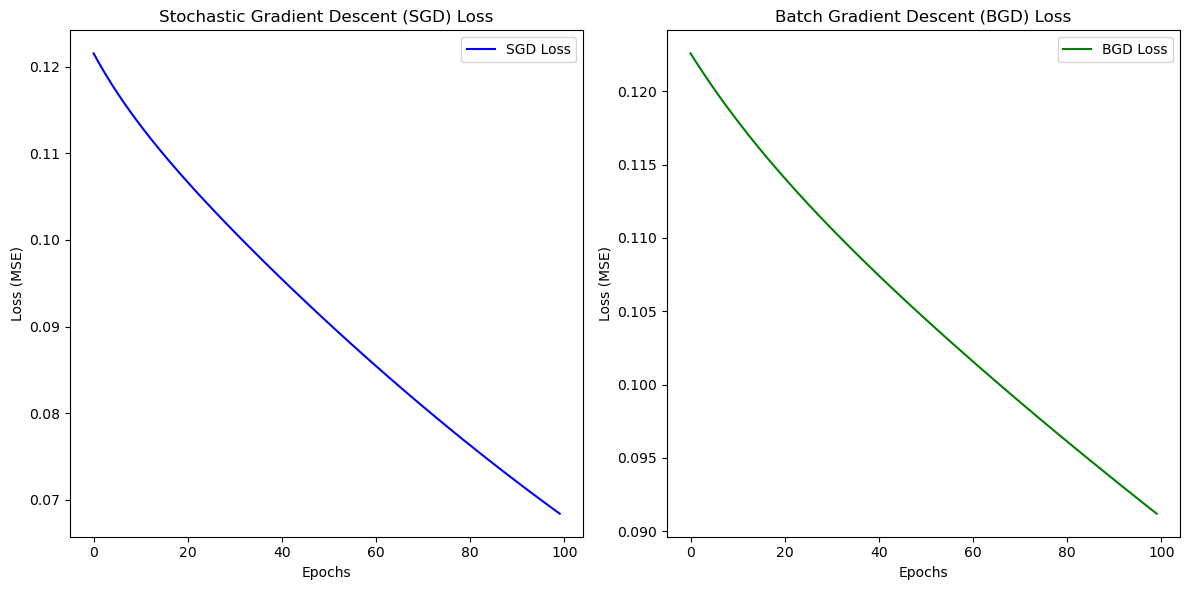


--- Results ---
Initial Weights: 0.0506, Initial Bias: 0.5000
SGD Final Weights: 0.4787, SGD Final Bias: -0.0815
BGD Final Weights: 0.3153, BGD Final Bias: 0.2135


In [39]:
# Dataset
X = np.array([0.5, 2.5])
Y = np.array([0.2, 0.9])

# Initialization
np.random.seed(4)
initial_weights = np.random.randn()  # Random initial weight
initial_bias = np.random.randn()     # Random initial bias
learning_rate = 0.1
epochs = 100

# Train using SGD
sgd_weights, sgd_bias, sgd_errors = stochastic_gradient_descent(
    X, Y, initial_weights, initial_bias, learning_rate, epochs)
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Mean Squared Error (MSE) loss function
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Forward pass
def forward_pass(inputs, weights, bias):
    return sigmoid(np.dot(inputs, weights) + bias)

# Stochastic Gradient Descent (SGD)
def stochastic_gradient_descent(X, Y, weights, bias, learning_rate, epochs):
    errors = []
    for epoch in range(epochs):
        for x, y in zip(X, Y):
            # Forward pass
            y_pred = forward_pass(x, weights, bias)

            # Compute gradients
            error = y - y_pred
            weight_grad = -error * sigmoid_derivative(y_pred) * x
            bias_grad = -error * sigmoid_derivative(y_pred)

            # Update weights and bias
            weights -= learning_rate * weight_grad
            bias -= learning_rate * bias_grad

        # Calculate loss after epoch
        epoch_loss = mse_loss(Y, forward_pass(X, weights, bias))
        errors.append(epoch_loss)

    return weights, bias, errors

# Batch Gradient Descent (Efficient version)
def batch_gradient_descent(X, Y, weights, bias, learning_rate, epochs):
    errors = []
    for epoch in range(epochs):
        # Forward pass for all inputs
        y_preds = forward_pass(X, weights, bias)

        # Compute gradients (vectorized)
        error = Y - y_preds
        weight_grad = -np.dot(error * sigmoid_derivative(y_preds), X) / len(X)
        bias_grad = -np.sum(error * sigmoid_derivative(y_preds)) / len(X)

        # Update weights and bias
        weights -= learning_rate * weight_grad
        bias -= learning_rate * bias_grad

        # Compute loss for this epoch
        epoch_loss = mse_loss(Y, y_preds)
        errors.append(epoch_loss)

    return weights, bias, errors

# Dataset
X = np.array([0.5, 2.5])
Y = np.array([0.2, 0.9])

# Initialization
np.random.seed(4)
initial_weights = np.random.randn()  # Random initial weight
initial_bias = np.random.randn()     # Random initial bias
learning_rate = 0.1
epochs = 100

# Train using SGD
sgd_weights, sgd_bias, sgd_errors = stochastic_gradient_descent(
    X, Y, initial_weights, initial_bias, learning_rate, epochs)

# Train using BGD
bgd_weights, bgd_bias, bgd_errors = batch_gradient_descent(
    X, Y, initial_weights, initial_bias, learning_rate, epochs)

# Plot loss over epochs
plt.figure(figsize=(12, 6))

# Subplot 1: SGD Loss
plt.subplot(1, 2, 1)
plt.plot(range(epochs), sgd_errors, label="SGD Loss", color='blue')
plt.title("Stochastic Gradient Descent (SGD) Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()

# Subplot 2: BGD Loss
plt.subplot(1, 2, 2)
plt.plot(range(epochs), bgd_errors, label="BGD Loss", color='green')
plt.title("Batch Gradient Descent (BGD) Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()

plt.tight_layout()
plt.show()

# Results
print("\n--- Results ---")
print(f"Initial Weights: {initial_weights:.4f}, Initial Bias: {initial_bias:.4f}")
print(f"SGD Final Weights: {sgd_weights:.4f}, SGD Final Bias: {sgd_bias:.4f}")
print(f"BGD Final Weights: {bgd_weights:.4f}, BGD Final Bias: {bgd_bias:.4f}")
